# Introduction to Artificial Neural Networks

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Oct 20, 2024 14:41

# Preamble

## Quote of the Day

[Sir Demis
Hassabis](https://www.linkedin.com/in/demishassabis/?originalSubdomain=uk)
is the Co-founder and CEO of [Google DeepMind](https://deepmind.google),
a leading company dedicated to addressing some of the most complex
scientific and engineering challenges of our era to propel scientific
advancement. A chess prodigy from the age of four, Hassabis achieved
master-level proficiency by 13 and served as the captain for several
England junior chess teams. In 2024, he was awarded the Nobel Prize in
[Chemistry](https://www.nobelprize.org/prizes/chemistry/2024/summary/)
for his contributions to the development of
[AlphaFold](https://deepmind.google/technologies/alphafold/).

## Learning objectives

-   **Explain** the architecture and function of feedforward neural
    networks (FNNs).
-   **Describe** the backpropagation algorithm and its role in training
    neural networks.
-   **Identify** common activation functions and understand their impact
    on network performance.
-   **Understand** the vanishing gradient problem and strategies to
    mitigate it.
-   **Apply** regularization techniques to improve neural network
    generalization.

# Summary

## 3Blue1Brown

<https://youtu.be/aircAruvnKk>

In my opinion, this is an **excellent** and **informative** video.

It is highly recommended that you watch this video. While it covers the
concepts we have already explored, it presents the material in a manner
that is challenging to replicate in a classroom setting.

-   Provides a clear explanation of the **intuition** behind the
    effectiveness of neural networks, detailing the **hierarchy of
    concepts** briefly mentioned in the last lecture.
-   Offers a compelling rationale for the necessity of a **bias term**.
-   Similarly, elucidates the concept of **activation functions** and
    the importance of a squashing function.
-   The segment beginning at 13m 26s offers a visual explanation of the
    **linear algebra** involved: $\sigma(W X^T + b)$.

## Summary - DL

-   **Deep learning (DL)** is a **machine learning** technique that can
    be applied to **supervised learning** (including **regression** and
    **classification**), **unsupervised learning**, and **reinforcement
    learning**.

-   Inspired from the structure and function of **biological neural
    networks** found in animals.

-   Comprises **interconnected neurons** (or units) arranged into
    **layers**.

## Summary - FNN

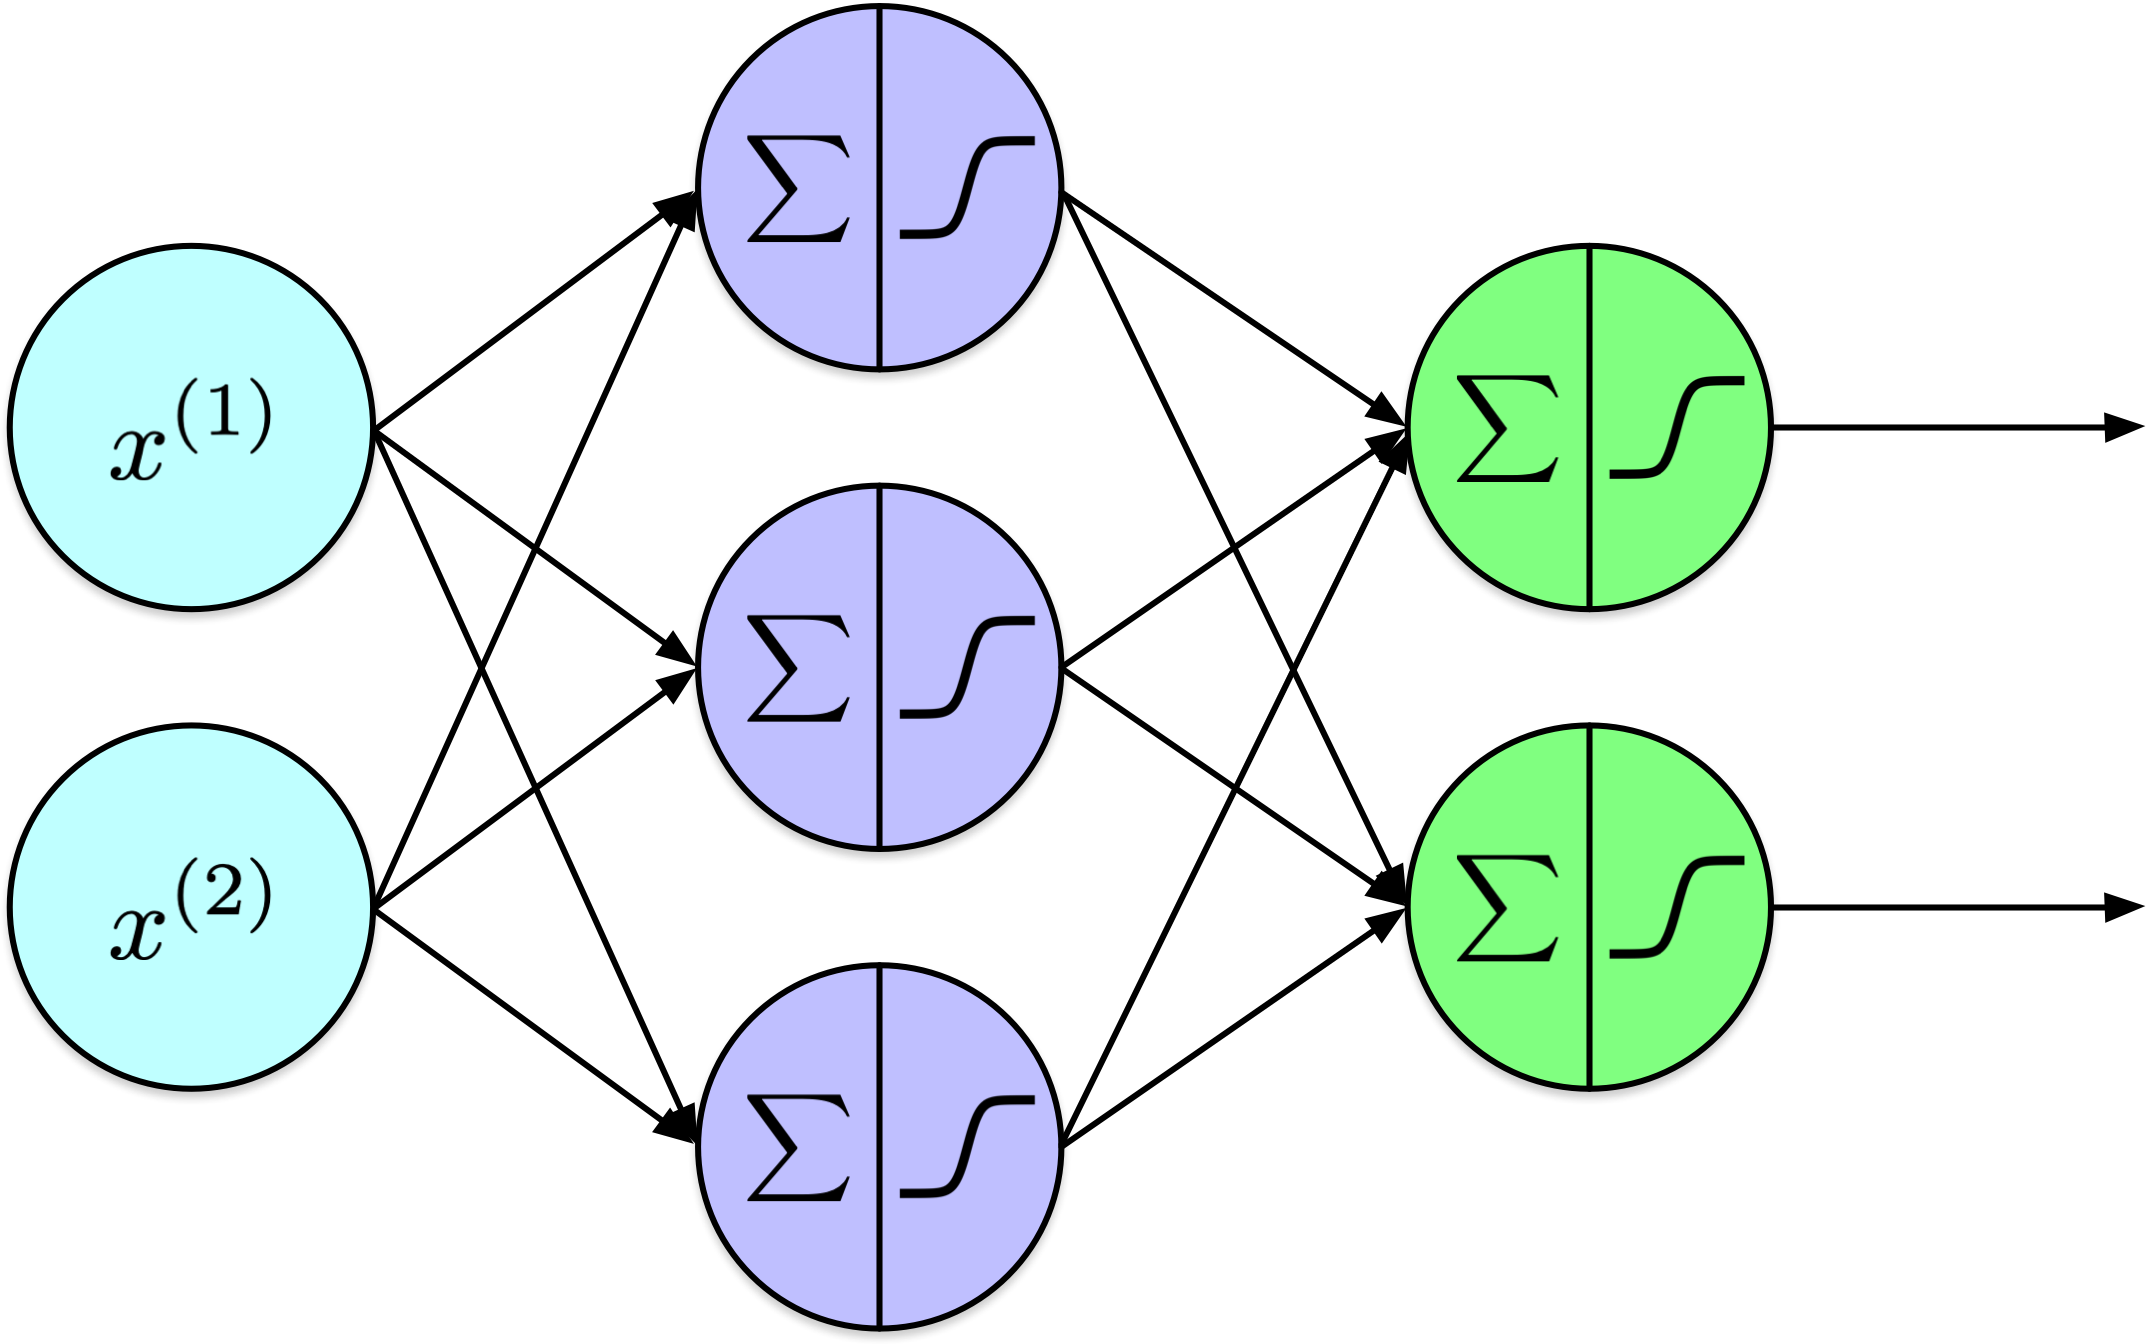

Information in this architecture flows unidirectionally—from left to
right, moving from input to output. Consequently, it is termed a
**feedforward neural network (FNN)**.

Neural networks have **inputs** and **outputs**.

The network consists of **three layers**: input, hidden, and output. The
**input layer** contains two nodes, the **hidden layer** comprises three
nodes, and the **output layer** has two nodes. Additional hidden layers
and nodes per layer can be added, which will be discussed later.

It is often useful to include explicit input nodes that do not perform
calculations, known as **input units** or **input neurons**. These nodes
act as placeholders to introduce input features into the network,
passing data directly to the next layer without transformation. In the
network diagram, these are the light blue nodes on the left. Typically,
**the number of input units corresponds to the number of features**.

## Summary - FNN

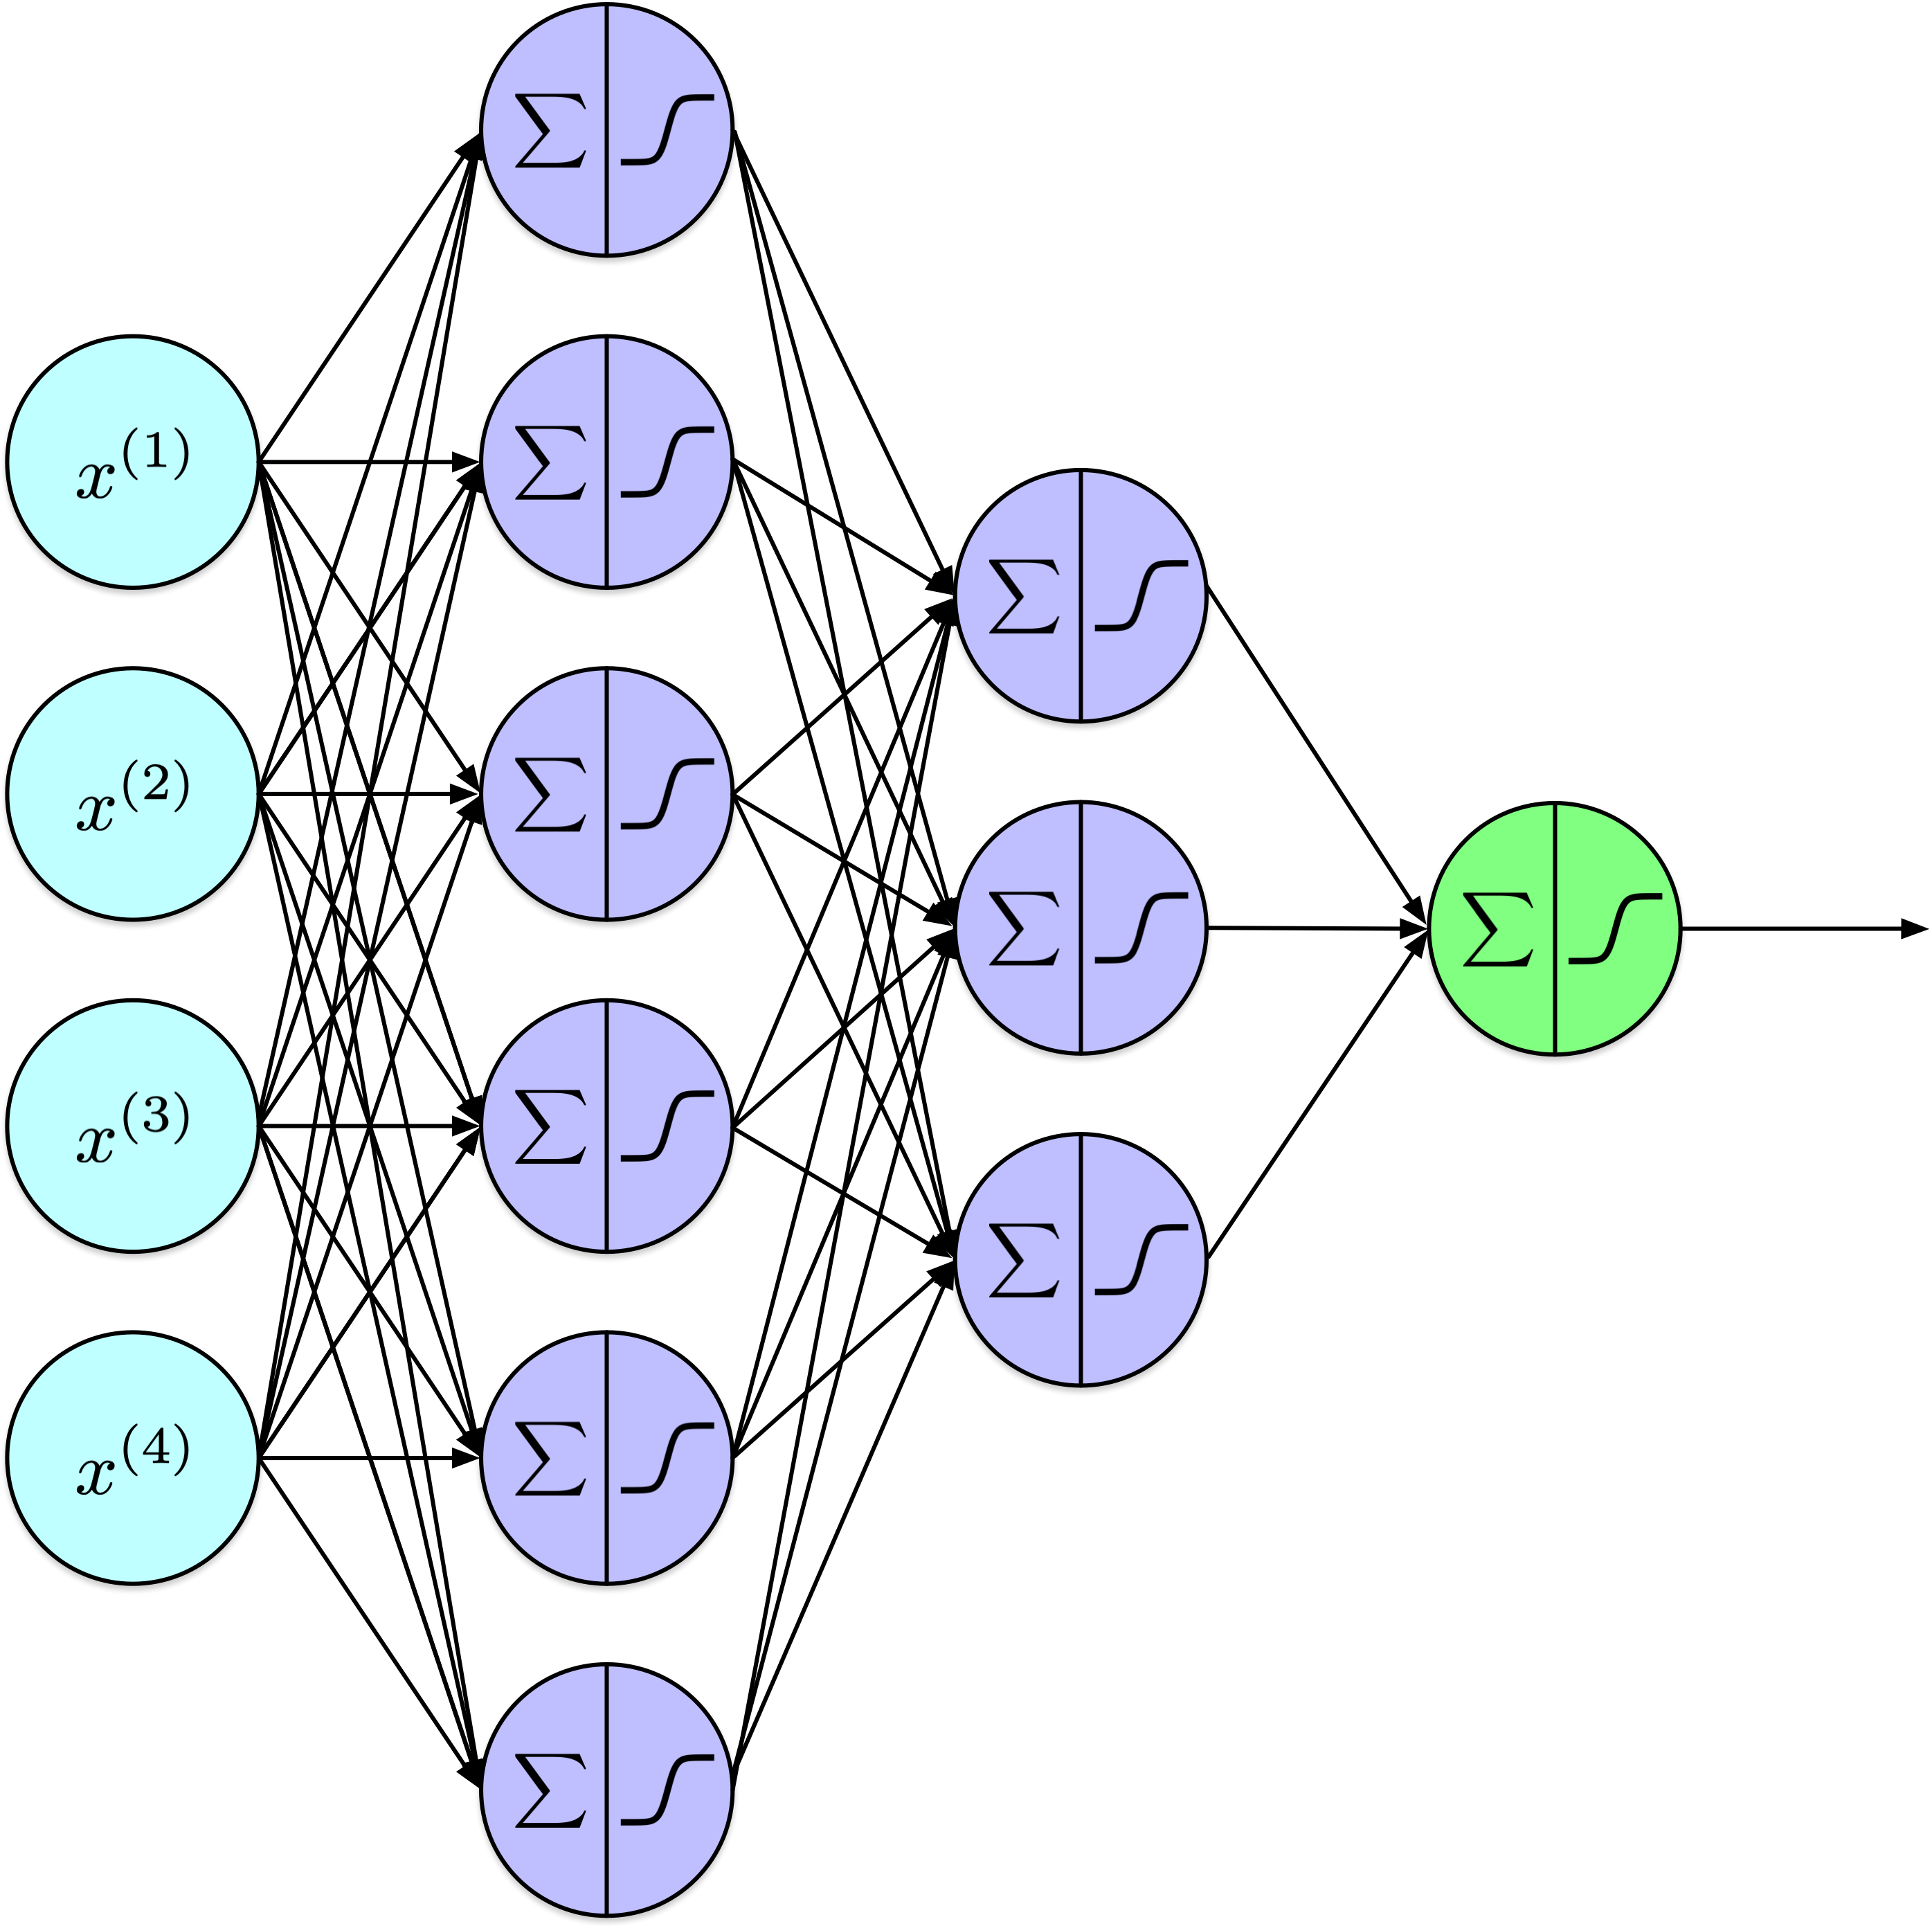

The number of **layers** and **nodes** can vary based on the specific
requirements.

Neural networks can have a significantly large number of input nodes,
often in the hundreds or thousands, depending on the complexity of the
data. Additionally, they may contain numerous hidden layers. For
instance, ResNet, which won the ILSVRC 2015 image classification task,
features 152 layers. The authors of ResNet have demonstrated results for
networks with 100 and even 1000 layers (He et al. 2016). However, the
number of output nodes tends to be relatively small. In regression
problems, there is typically one output node, while in classification
tasks (whether multiclass or multilabel), the number of output nodes
corresponds to the number of classes.

## Summary - units

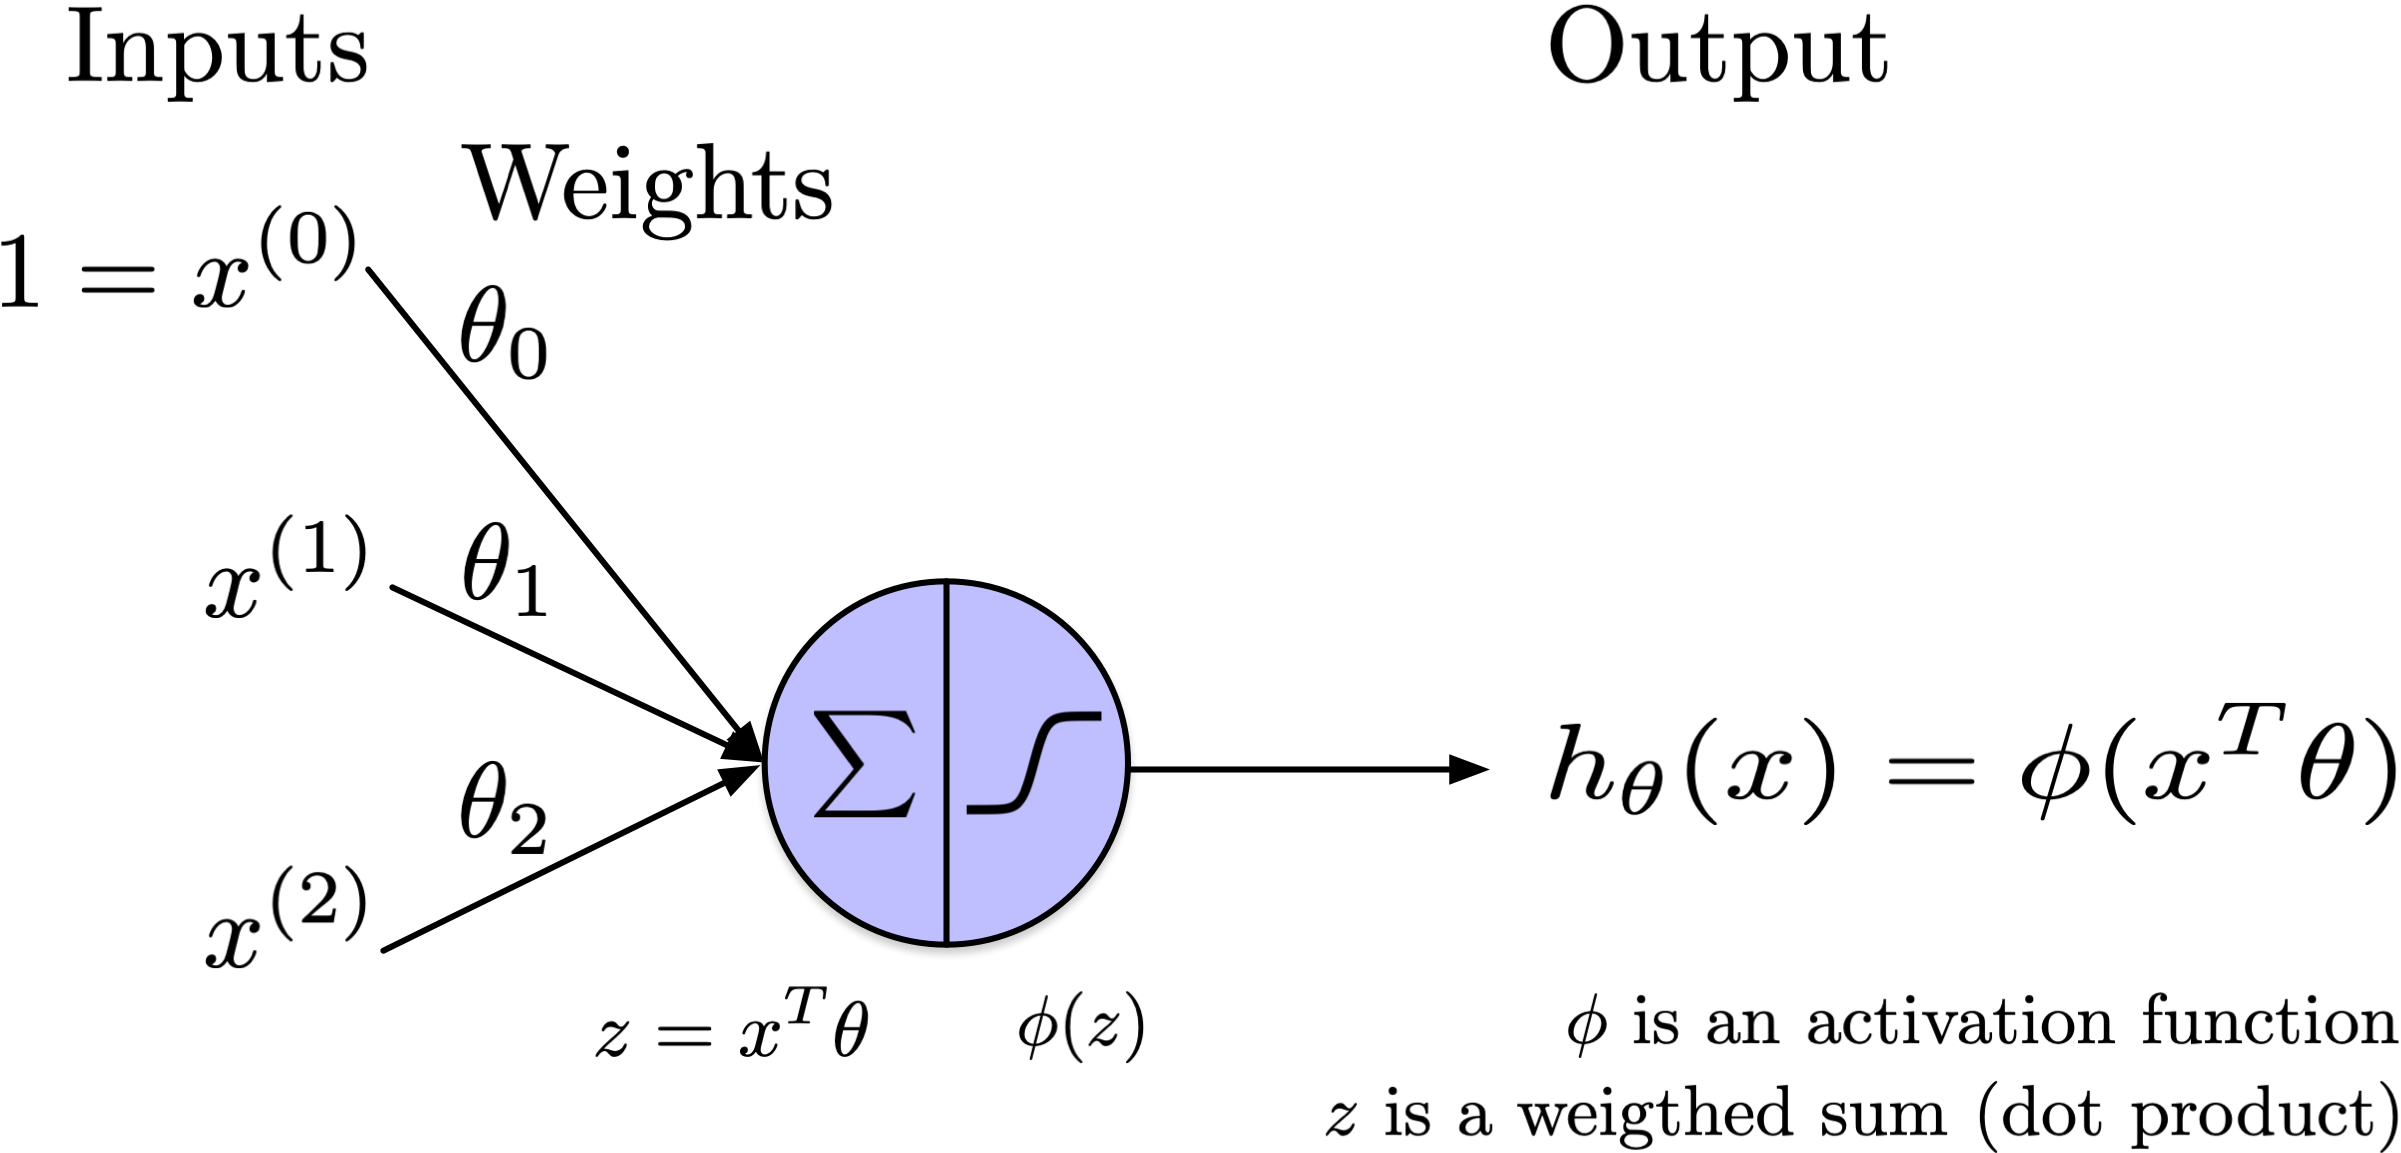

Introducing a fictitious input $x^{(0)} = 1$ is a *hack* that simplifies
the expression $x^T\theta + b$.

In the diagram above, it is important to clarify that the inputs and
output pertain specifically to this individual unit, rather than to the
entire network’s global inputs and output.

The name **activation** originates from the function’s role in
determining whether a neuron should be “activated” or “fired” based on
its input.

Historically, the concept was inspired by biological neurons, where a
neuron activates and transmits a signal to other neurons if its input
exceeds a certain threshold. In artificial neural networks, the
activation function serves a similar purpose by introducing
non-linearity into the model. This non-linearity is crucial because it
enables the network to learn complex patterns and representations in the
data.

## Common Activation Functions

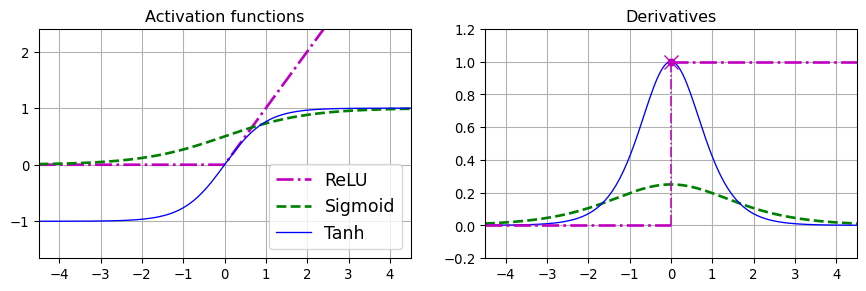

Géron (2022) –
[10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

Consider the following observations:

-   The sigmoid function produces outputs within the open interval
    $(0, 1)$.
-   The hyperbolic tangent function ($\tanh$) has an image spanning the
    open interval $(-1, 1)$.
-   The Rectified Linear Unit (ReLU) function outputs values in the
    interval $[0, \infty)$. max of 0 and input

Additionally, note:

-   The maximum derivative value of the sigmoid function is 0.25. cause of stagnation in ai
-   The maximum derivative value of the $\tanh$ function is 1.
-   The derivative of the ReLU function is 0 for negative inputs and 1
    for positive inputs.

Furthermore:

-   A node employing ReLU as its activation function generates outputs
    within the range $[0, \infty)$. However, its derivative, utilized in
    gradient descent during backpropagation, is constant, taking values
    of either 0 or 1.

## Universal Approximation

The **universal approximation theorem** states that a feedforward neural
network with a single hidden layer containing a finite number of neurons
can **approximate any continuous function** on a compact subset of
$\mathbb{R}^n$, given appropriate weights and activation functions.

Cybenko (1989); Hornik, Stinchcombe, and White (1989)

# Notation

## Notation

A **two-layer** perceptron computes:

$$
  y = \phi_2(\phi_1(X))
$$

where

$$
  \phi_l(Z) = \phi(W_lZ_l + b_l)
$$

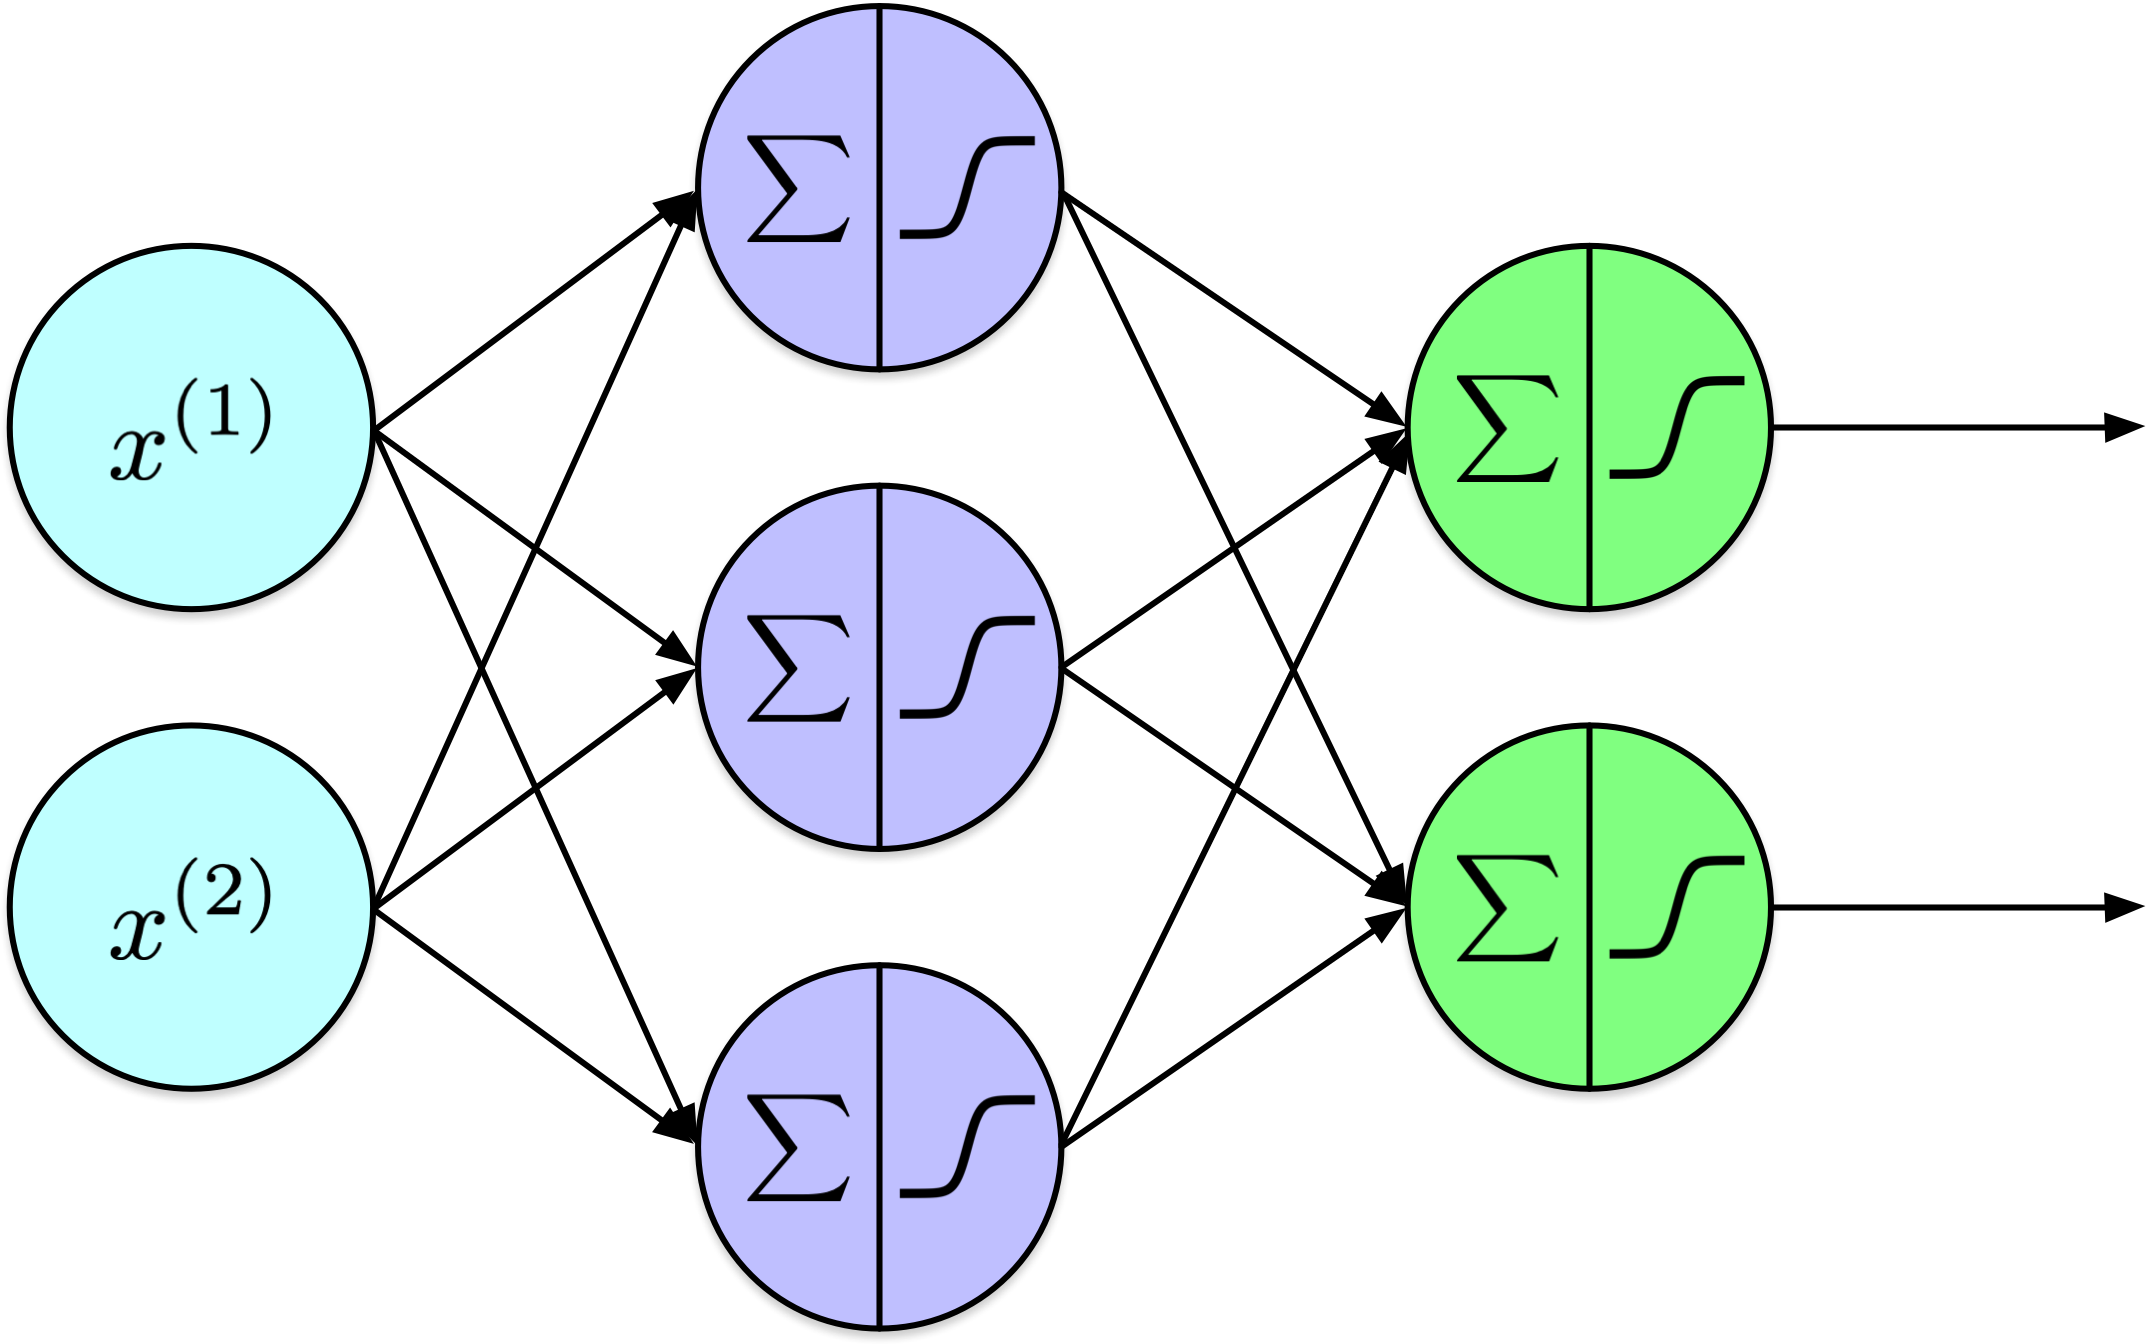

Where $\phi$ is an activation function, $W$ a weight matrix, $X$ an
input matrix, and $b$ a bias vector.

## Notation

A **3-layer** perceptron computes:

$$
  y = \phi_3(\phi_2(\phi_1(X)))
$$

where

$$
  \phi_l(Z) = \phi(W_lZ_l + b_l)
$$

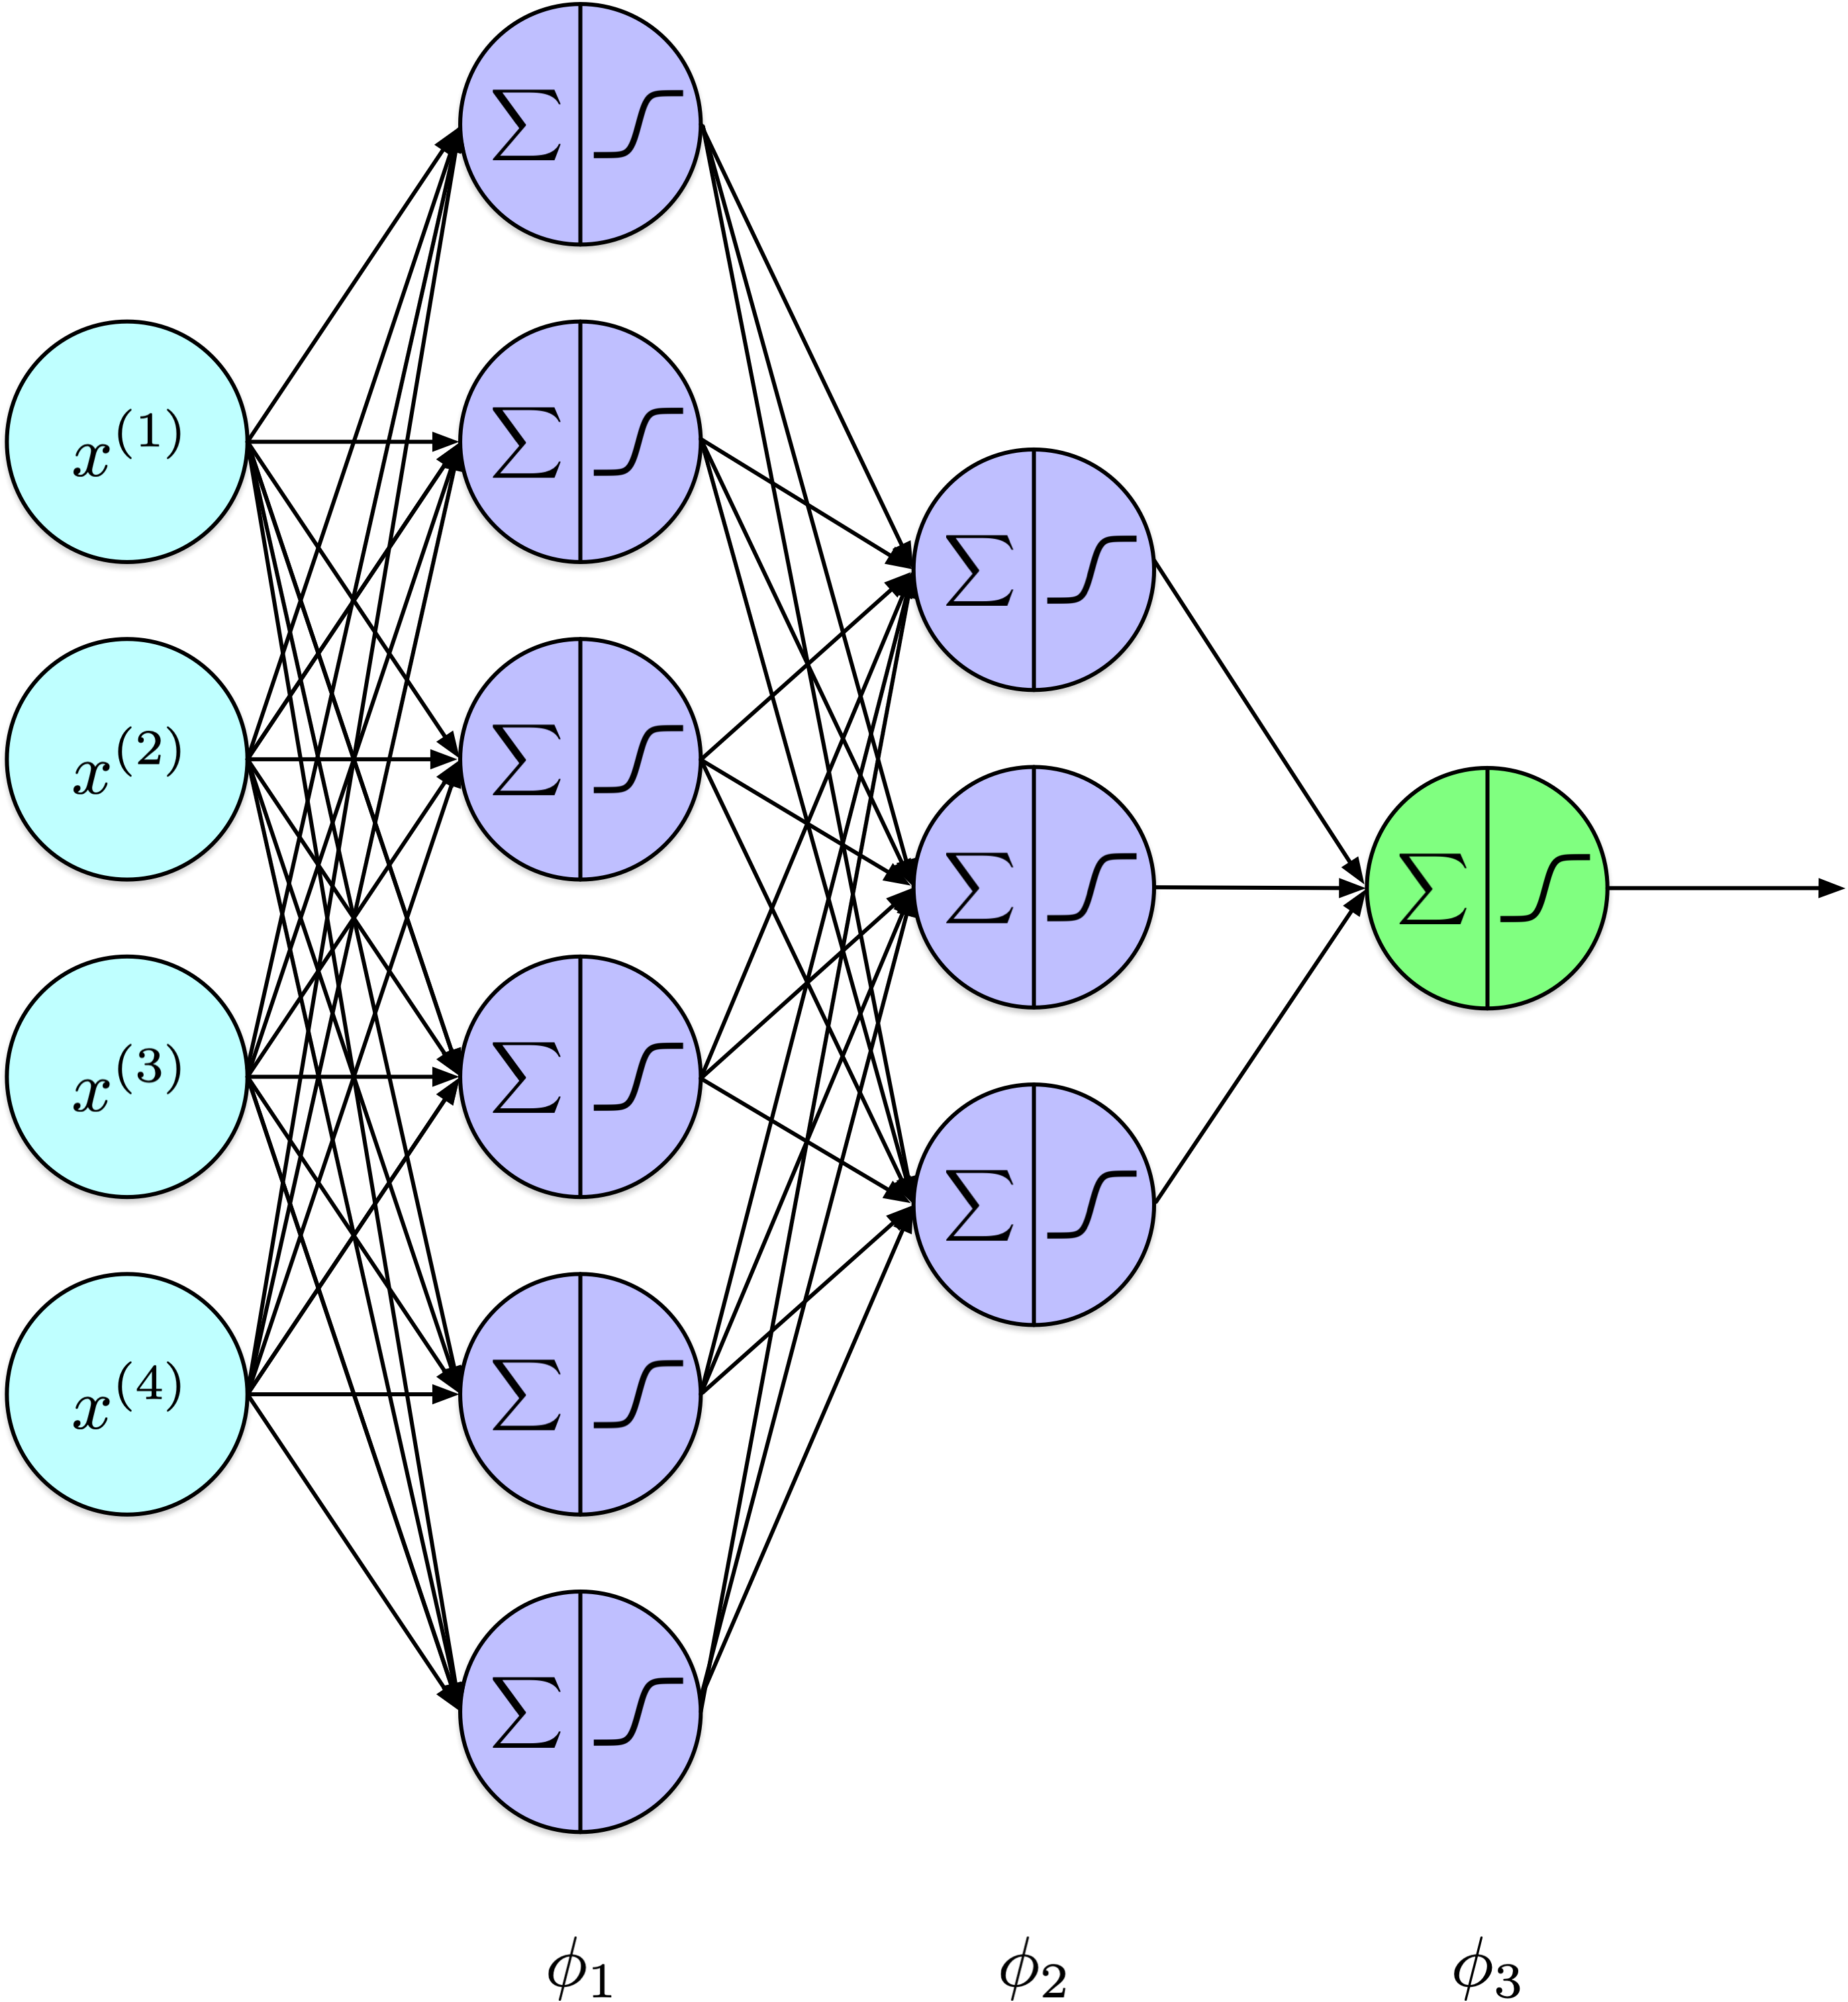

## Notation

A **$k$-layer** perceptron computes:

$$
  y = \phi_k( \ldots \phi_2(\phi_1(X)) \ldots )
$$

where

$$
  \phi_l(Z) = \phi(W_lZ_l + b_l)
$$

A feedforward network exhibits a consistent structure, where each layer
executes the same type of computation on varying inputs. Specifically,
the input to layer $l$ is the output from layer $l-1$.

- parameter efficiency goes down when you have lots of nodes in the first layer
- the first layer often doesn't capture the full pattern
- ffn is sequential model
- softmax works well when outputs are probabilities
- number of output nodes = number of categories
- may wanna use stoichastic gradient descent for a3
- 1 epoch: has seen all training samples

# Back-propagation

## 3Blue1Brown

<https://youtu.be/Ilg3gGewQ5U>

## Back-propagation

**Learning representations by back-propagating errors**

*David E. Rumelhart, <u>Geoffrey E. Hinton</u> & Ronald J. Williams*

We describe a new learning procedure, back-propagation, for networks of
neurone-like units. The procedure **repeatedly adjusts the weights** of
the connections in the network so as to **minimize a measure of the
difference between the actual output vector of the net and the desired
output vector**. As a result of the weight adjustments, internal
‘**hidden**’ units which are not part of the input or output come to
**represent important features of the task domain**, and the
regularities in the task are captured by the interactions of these
units. The **ability to create useful new features** distinguishes
back-propagation from earlier, simpler methods such as the
perceptron-convergence procedure.

Rumelhart, Hinton, and Williams (1986)

I am presenting here the abstract from the seminal Nature publication
where Hinton and colleagues introduced the backpropagation algorithm.
This abstract is both elegant and informative, effectively capturing the
core principles of modern neural networks: the concept of a loss
function, the iterative adjustment of weights through the gradient
descent algorithm, and the critical role of hidden layers in generating
useful task-dependent features.

Nature is a prestigious journal, and it only occasionally publishes
content related to computer science.

At the time of this publication, Hinton was affiliated with Carnegie
Mellon University. As a reminder, Hinton received the Nobel Prize in
Physics in 2024 for his contributions to developing foundational methods
in modern machine learning.

The abstract highlights the rationale for using hidden layers in neural
networks. The initial hidden layers learn simple representations
directly from the input data, while subsequent layers identify
associations among these representations. Each layer builds upon the
knowledge of previous layers, culminating in the network’s final output.

## Before the back-propagation

-   Limitations, such as the **inability to solve the XOR classification
    task**, essentially **stalled** research on neural networks.

-   The perceptron was **limited to a single layer**, and there was **no
    known method for training a multi-layer perceptron**.

-   Single-layer perceptrons are limited to solving classification tasks
    that are **linearly separable**.

## Back-propagation: contributions

-   The model employs **mean squared error** as its **loss function**.

-   **Gradient descent** is used to **loss**.

-   A **sigmoid activation function** is used instead of a step
    function, as its **derivative** provides valuable information for
    gradient descent.

-   Shows how updating **internal weights** using a **two-pass**
    algorithm consisting of a **forward** pass and a **backward** pass.

-   **Enables training multi-layer perceptrons.**

## Backpropagation: top level

1.  **Initialization** initialize the weights

2.  **Forward Pass**

3.  **Compute Loss**

4.  **Backward Pass (Backpropagation)**

5.  **Repeat 2 to 5**.

The algorithm **stops** either after a **predefined number of epochs**
or when c**onvergence criteria are satisfied**.

## Backpropagation: 1. Initialization

Initialize the **weights** and **biases** of the neural network.

1.  **~~Zero Initialization~~**
    -   All weights are **initialized to zero**.
    -   Symmetry problems, **all neurons produce identical outputs**,
        preventing effective learning.
    - bad idea, nothing that the back-prop can use to decide which weight has more influence on the output
2.  **Random Initialization**
    -   Weights are initialized **randomly**, often using a **uniform**
        or **normal** distribution.
    -   **Breaks the symmetry between neurons**, allowing them to learn.
    -   If not scaled properly, leads to **slow convergence** or
        **vanishing/exploding gradients**.

**See also**: Xavier/Glorot and He initialization (later)

Initializing weights and biases to zero works for logistic regression
because it is a linear model with a single layer. In logistic
regression, each feature’s weight is independently adjusted during
training, and the optimization process can converge correctly regardless
of the initial weights, provided the data is linearly separable.

However, zero initialization does not work well for neural networks due
to their multi-layered structure. Here’s why:

1.  **Symmetry Breaking**: Neural networks require breaking symmetry
    between neurons in each layer so that they can learn different
    features. If all weights are initialized to zero, each neuron in a
    layer will compute the same output and receive the same gradient
    during backpropagation. This results in the neurons updating
    identically, preventing them from learning distinct features and
    effectively rendering multiple neurons redundant.

2.  **Non-Linearity**: Neural networks rely on non-linear
    transformations between layers to model complex relationships in the
    data. Zero initialization inhibits the ability of neurons to
    activate differently, impeding the network’s capacity to capture
    non-linear patterns.

## Backpropagation: 2. Forward Pass

**For each example** in the training set (or in a mini-batch):

-   **Input Layer**: Pass input features to first layer.

-   **Hidden Layers**: For each hidden layer, compute the
    **activations** (output) by applying the **weighted sum of inputs
    plus bias**, followed by an **activation function** (e.g., sigmoid,
    ReLU).

-   **Output Layer**: Same process as hidden layers. Output layer
    activations represent the predicted values.
- save the output in the node, for back prop to use

The forward pass is almost identical to applying the network for
prediction (`.predict()`), with the exception that intermediate
(activation) results are saved, as they are needed for the backward
pass.

In practice, it is the mini-batch version of this algorithm that is
being used.

## Backpropagation: 3. Compute Loss

Calculate the **loss** (**error**) using a suitable loss function by
comparing the **predicted values** to the **actual target** values.

More on the various loss functions coming later: **mean squared error**
for regression tasks or **cross-entropy** loss for classification tasks.

A smaller loss indicates that the predicted values are closer to the
actual target values.

The value of the loss function can serve as a stopping criterion, with
backpropagation halting when the loss is sufficiently small.

Crucially, the derivative of the loss function provides essential
information for adjusting the network’s weights and bias terms.

## Backpropagation: 4. Backward Pass

-   **Output Layer**: Compute the **gradient of the loss** with respect
    to the output layer’s **weights** and **biases** using the **chain
    rule of calculus**.

-   **Hidden Layers**: **Propagate the error backward** through the
    network, **layer by layer**. For each layer, compute the gradient of
    the loss with respect to the weights and biases. Use the derivative
    of the activation function to help calculate these gradients.

-   **Update Weights and Biases**: Adjust the weights and biases using
    the calculated gradients and a learning rate, which determines the
    step size for each update.

Common optimization techniques like **gradient descent** or its variants
(e.g., Adam) are employed.

At the end of the presentation, links are provided to a series of videos
by Herman Kamper. These videos elucidate the intricacies of the
backpropagation algorithm across various architectures, both with and
without forks, utilizing function composition and graph computation
approaches.

While the algorithm is complex due to the numerous cases it entails, its
regular structure makes it suitable for automation. Specifically,
algorithms like automatic differentiation (autodiff) facilitate this
process.

In 1970, [Seppo Ilmari
Linnainmaa](https://en.wikipedia.org/wiki/Seppo_Linnainmaa) introduced
the algorithm known as reverse mode automatic differentiation in his MSc
thesis. Although he did not apply this algorithm to neural networks, it
is more general than backpropagation.

## Key Concepts

-   **Activation Functions**: Functions like sigmoid, ReLU, and tanh
    introduce non-linearity, which allows the network to learn complex
    patterns.

-   **Learning Rate**: A hyperparameter that controls how much to change
    the model in response to the estimated error each time the model
    weights are updated.

-   **Gradient Descent**: An optimization algorithm used to minimize the
    loss function by iteratively moving towards the steepest descent as
    defined by the negative of the gradient.

## Summary

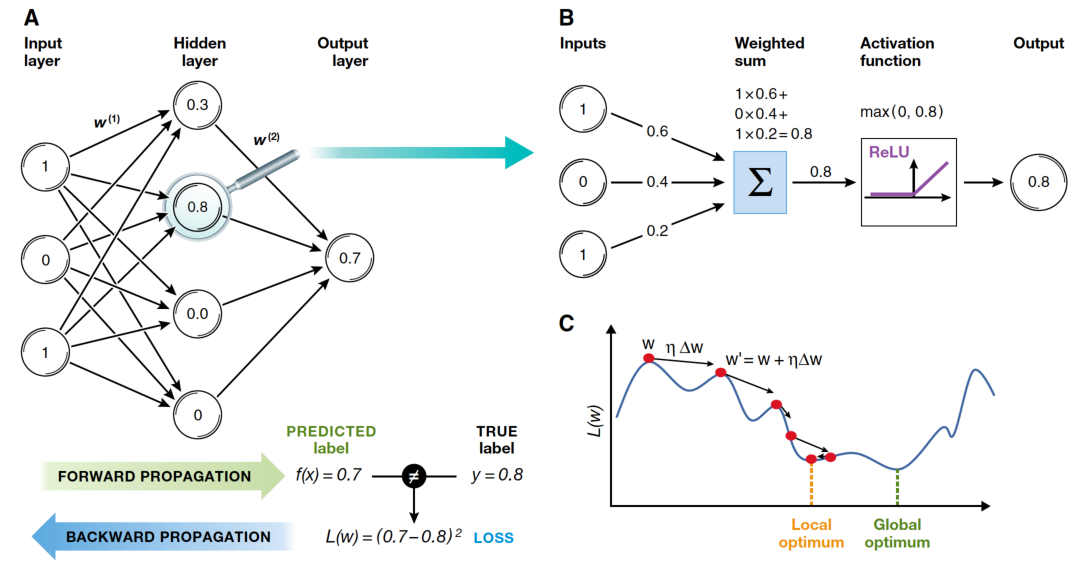

**Attribution**: Angermueller et al. (2016)

# Training

## Vanishing gradients
- vanishing weights -> algo is almost not learning

-   **Vanishing gradient problem**: Gradients become too small,
    **hindering weight updates**.

-   **Stalled** neural network research (again) in early 2000s.

-   **Sigmoid** and its derivative (range: 0 to 0.25) were key factors.

-   **Common initialization**: Weights/biases from $\mathcal{N}(0, 1)$
    contributed to the issue.

Glorot and Bengio (2010) shed light on the problems.

The vanishing gradient problem often occurs with activation functions
like the sigmoid and hyperbolic tangent (tanh), leading to difficulties
in training deep neural networks due to diminishing gradients that slow
down learning.

In contrast, the exploding gradient problem, which involves gradients
growing excessively large, is typically observed in architectures such
as recurrent neural networks (RNNs).

Both issues can significantly affect the stability and convergence of
gradient-based optimization techniques, thereby hindering the effective
training of deep models.

## Vanishing gradients: solutions

-   **Alternative activation functions**: Rectified Linear Unit
    (**ReLU**) and its variants (e.g., **Leaky ReLU**, **Parametric
    ReLU**, and **Exponential Linear Unit**).
- leaky ReLU > ReLU

-   **Weight Initialization**: Xavier (Glorot) or He initialization.

Other techniques exists to mitigate the problem, including those:

-   **Batch Normalization**: Implement batch normalization to
    standardize the inputs to each layer, which can help stabilize and
    accelerate training by reducing internal covariate shift and
    maintaining effective gradient flow.

-   **Residual Networks**: Use residual connections, as seen in ResNet
    architectures, which allow gradients to flow more easily through the
    network by providing shortcut paths that bypass one or more layers.

## Glorot and Bengio

**Objective:** Mitigate the unstable gradients problem in deep neural
networks.

**Signal Flow:**

-   **Forward Direction:** Ensure stable signal propagation for accurate
    predictions.
-   **Reverse Direction:** Maintain consistent gradient flow during
    backpropagation.

Glorot and Bengio (2010): pay attention to signal flow in both
directions!

## Glorot and Bengio

**Variance Matching:**

-   **Forward Pass:** Ensure the output variance of each layer matches
    its input variance.

-   **Backward Pass:** Maintain equal gradient variance before and after
    passing through each layer.

Keras employs Glorot initialization by default, which is well-suited for
activation functions such as **sigmoid**, **tanh**, and **softmax**.

## He initialization

A similar but slightly different initialization method design to work
with **ReLU**, as well as **Leaky ReLU**, **ELU**, **GELU**, **Swish**,
and **Mish**.

. . .

Ensure that the initialization method **matches** the chosen activation
function.

In [2]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense

dense = Dense(50, activation="relu", kernel_initializer="he_normal")

AKA Kaiming initialization.

-   **Glorot Initialization (Xavier Initialization):** This method sets
    the initial weights based on the number of input and output units
    for each layer, aiming to keep the variance of activations
    consistent across layers. It is particularly effective for
    activation functions like sigmoid and tanh.

-   **He Initialization:** This approach adjusts the weight
    initialization to be suitable for layers using ReLU and its
    variants, by scaling the variance according to the number of input
    units only.

## Note

Randomly initializing the weights[1] is sufficient to **break symmetry**
in a neural network, **allowing the bias terms to be set to zero**
without impacting the network’s ability to learn effectively.

## Activation Function: Leaky ReLU

[1] Proper initialization of weights, such as using Xavier/Glorot or He
initialization, is crucial and should be aligned with the choice of
activation function to ensure optimal network performance.

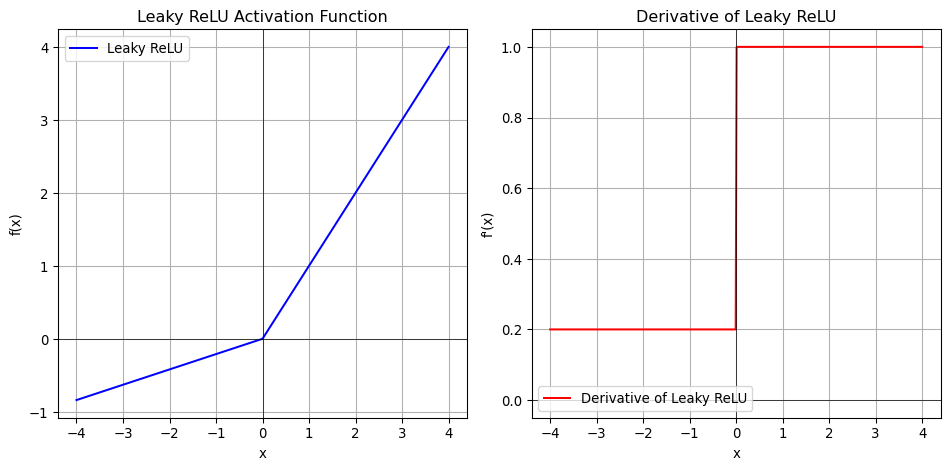

The Leaky ReLU, a variant of the standard ReLU activation function,
effectively mitigates the issue of *dying ReLU nodes*. For negative
input values, it introduces a linear component with a slope governed by
the parameter `negative_slope`.

When the input to the ReLU activation function, the weighted sum plus
bias, is negative for all the training examples, the output value of
ReLU is zero. But also, its derivative is 0, which effectively
deactivates the neuron. Leaky ReLU, or other variants, effectively
mitigates the issue.

``` python
import tensorflow as tf
from tensorflow.python.keras.layers import Dense

leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
```

Keras proposes 18 [layer activation
functions](https://keras.io/api/layers/activations/#available-activations)
at the time of writing.

## Output Layer: Regression Task

-   **\# of output neurons**:
    -   1 per dimension
-   **Output layer activation function**:
    -   None, *ReLU/softplus*, if positive, *sigmoid/tanh*, if bounded
-   **Loss function**:
    -   [MeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

In an [object detection
problem](https://keras.io/guides/keras_cv/object_detection_keras_cv/),
determining the **bounding box** exemplifies a regression task where the
output is multidimensional.

## Output Layer: Classification Task

-   **\# of output neurons**:
    -   1 if binary, 1 per class, if multi-label or multiclass.
-   **Output layer activation function**:
    -   *sigmoid*, if binary or multi-label, *softmax* if multi-class.
-   **Loss function**:
    -   cross-entropy

## Softmax

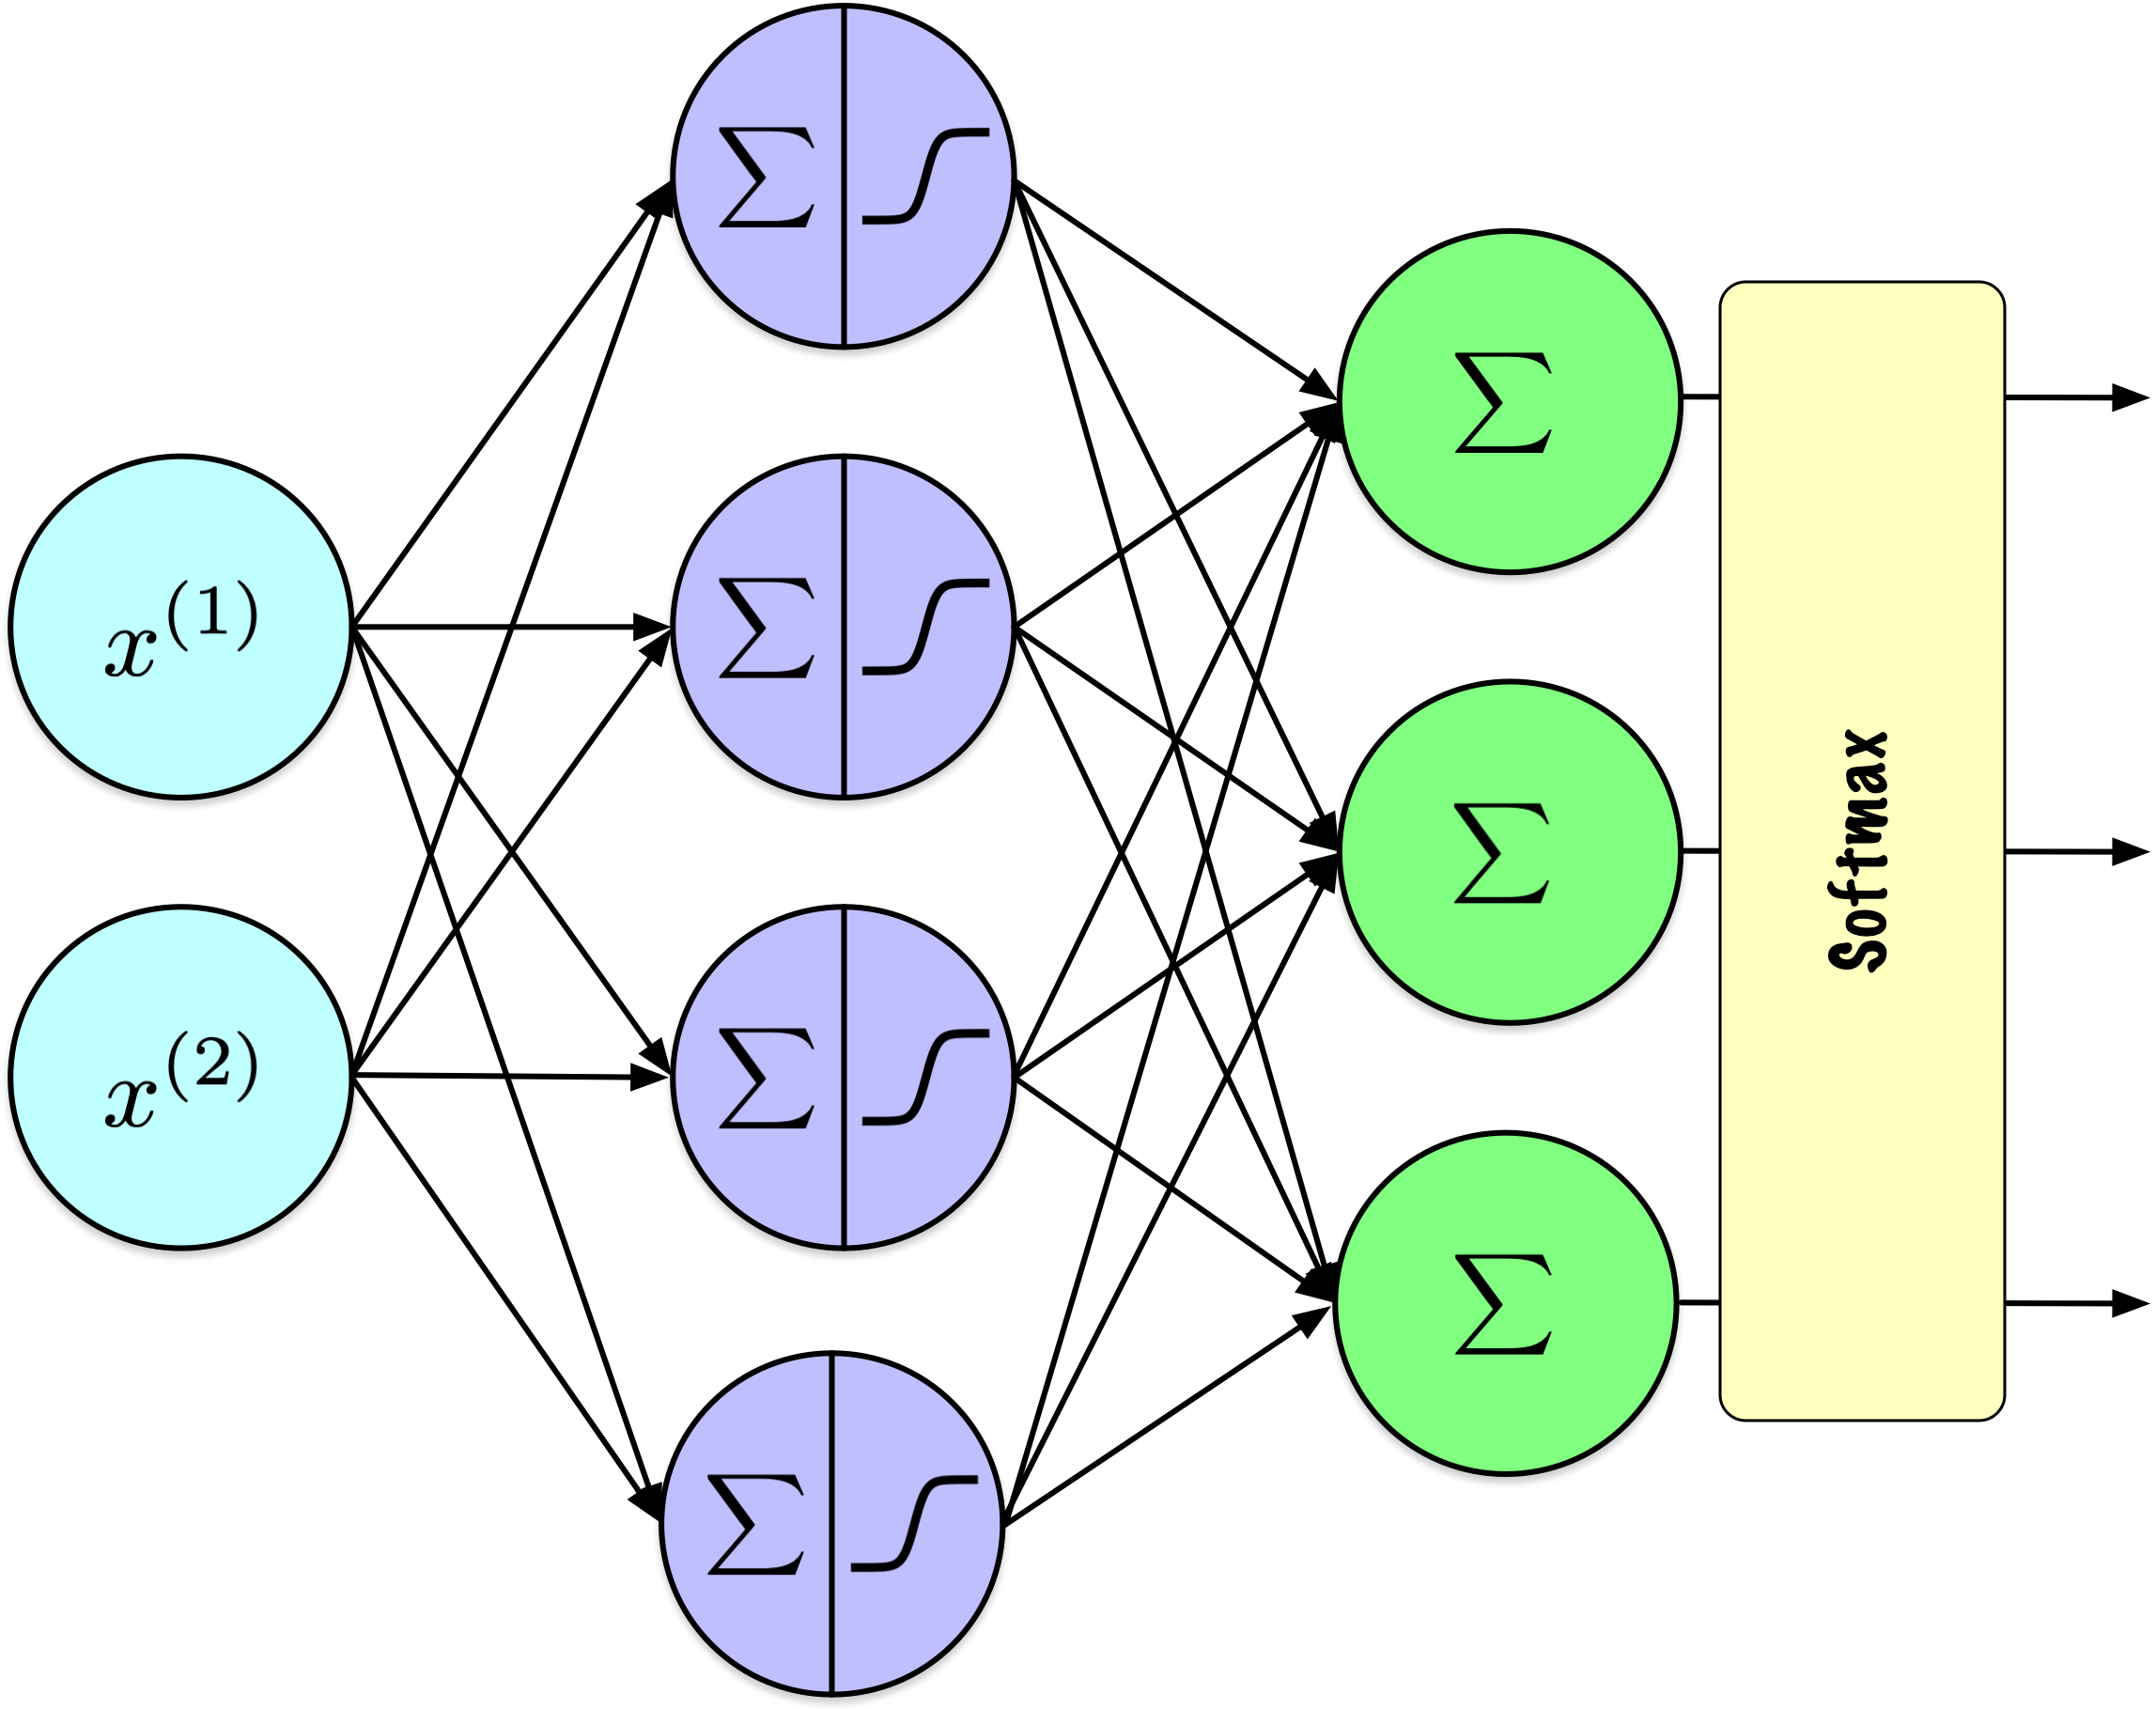

**Softmax** ensures that all activation outputs fall between 0 and 1 and
collectively sum to 1.

Observe that I have revised the representation of the output nodes to
indicate that the softmax function is applied to the entire layer,
rather than to individual nodes. This function transforms the raw output
values of the layer into probabilities that sum to 1, facilitating
multi-class classification. This characteristic distinguishes it from
activation functions like ReLU or sigmoid, which are typically applied
independently to each node’s output.

The $\argmax$ function is not suitable for optimization via
gradient-based methods because its derivative is zero in all cases,
similar to step functions. In contrast, the softmax function offers both
a probabilistic interpretation and a computable derivative, making it
more effective for such applications.

The $\argmax$ function can be applied *a posteriori* to trained networks
for class prediction.

## Softmax

The **softmax** function is an **activation function** used in
**multi-class classification problems** to convert a vector of raw
scores into **probabilities that sum to 1**.

Given a vector $\mathbf{z} = [z_1, z_2, \ldots, z_n]$:

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where $\sigma(\mathbf{z})_i$ is the probability of the $i$-th class, and
$n$ is the number of classes.

Softmax emphasizes higher scores while suppressing lower ones, enabling
a probabilistic interpretation of the outputs.

We clearly see that such an activation applies for an entire layer since
the denomination depends on the values of all the $z_j$, for
$j in 1 \ldots n$.

## Softmax

|    $z_1$ |    $z_2$ |    $z_3$ | $\sigma(z_1)$ | $\sigma(z_2)$ | $\sigma(z_3)$ | $\sum$ |
|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| **1.47** |    -0.39 |     0.22 |      **0.69** |          0.11 |          0.20 |   1.00 |
|     5.00 | **6.00** |     4.00 |          0.24 |      **0.67** |          0.09 |   1.00 |
|     0.90 |     0.80 | **1.10** |          0.32 |          0.29 |      **0.39** |   1.00 |
|    -2.00 | **2.00** |    -3.00 |          0.02 |      **0.98** |          0.01 |   1.00 |

Softmax values for a vector of length 3.

1.  **Maintains Relative Order**: The softmax function preserves the
    relative order of the input values. If one input is greater than
    another, its corresponding output will also be greater.

2.  **Interpreted as probabilities**: Each value is in the range 0 to 1.
    The output values from the softmax function are normalized to sum to
    one, which allows them to be interpreted as probabilities.

3.  **Relative Differences**: When the relative differences among the
    input values are small, the differences in the output probabilities
    remain small, reflecting the input distribution. When the input
    values are identical, the output values will be $\frac{1}{n}$, where
    $n$ is the number of classes.

4.  **Wide Range of Values**: The softmax function can effectively
    handle a wide range of input values, thanks to the exponential
    function and normalization, which scale the inputs to a
    probabilistic range.

These properties make the softmax function particularly useful for
multi-class classification tasks in machine learning.

## Softmax

<https://www.youtube.com/watch?v=KpKog-L9veg>

## Cross entropy loss function

The **cross entropy** in a **multi-class classification task** for one
example:

$$
J(W) = -\sum_{k=1}^{K} y_k \log(\hat{y}_k)
$$

Where:

-   $K$ is the **number of classes**.
-   $y_k$ is the **true distribution** for the class $k$.
-   $\hat{y}_k$ is the **predicted probability** of class $k$ from the
    model.

-   The target vector $y$ is expressed as a one-hot encoded vector of
    length $K$, where the element corresponding to the true class is set
    to 1, and all other elements are 0.

-   Consequently, in the summation over classes, only the term
    associated with the true class contributes a non-zero value.

-   Therefore, the cross-entropy loss for a single example is given by
    $-\log(\hat{y}_k)$, where $\hat{y}_k$ is the predicted probability
    for the true class.

-   The predicted probability $\hat{y}_k$ is derived from the softmax
    function applied in the output layer of the neural network.

## Cross entropy loss function

-   **Classification Problem**: 3 classes
    -   Setosa, Versicolour, Virginica.
-   **One-Hot Encoding**:
    -   Setosa = $[0, 1, 0]$.
-   **Softmax Outputs & Loss**:
    -   $[0.22,\mathbf{0.7}, 0.08]$: Loss = $-\log(0.7) = 0.3567$.
    -   $[0.7, \mathbf{0.22}, 0.08]$: Loss = $-\log(0.22) = 1.5141$.
    -   $[0.7, \mathbf{0.08}, 0.22]$: Loss = $-\log(0.08) = 2.5257$.

Among the softmax outputs, cross-entropy evaluates only the component
corresponding to $k=1$ (Setosa), as the other entries in the one-hot
encoded vector are zero. This relevant element is highlighted in bold.
When the softmax prediction aligns closely with the expected value, the
resulting loss is minimal (0.3567). Conversely, as the prediction
deviates further from the expected value, the loss increases (1.5141 and
2.5257).

## Case: one example

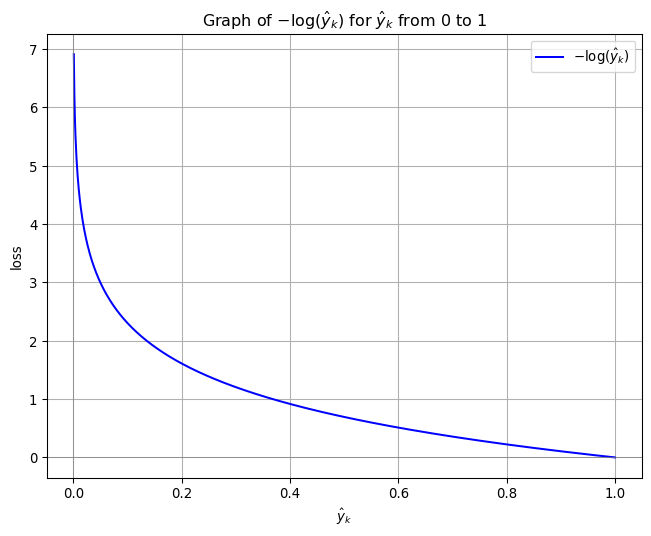

-   In the summation, only the term where $y_k = 1$ contributes a
    non-zero value.

-   Due to the negative sign preceding the summation, the value of the
    function is $-\log(\hat{y}_k$.

-   If the predicted probability $\hat{y}_k$ is near 1, the loss
    approaches zero, indicating minimal penalty.

-   Conversely, as $\hat{y}_k$ nears 0, indicating an incorrect
    prediction, the loss approaches infinity. This substantial penalty
    allows cross-entropy loss to converge more quickly than mean squared
    error.

## Case: dataset

For a dataset with $N$ examples, the **average cross-entropy loss** over
all examples is computed as:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})
$$

Where:

-   $i$ indexes over the different **examples** in the dataset.
-   $y_{i,k}$ and $\hat{y}_{i,k}$ are the **true** and **predicted
    probabilities** for class $k$ of example $i$, respectively.

# Regularization

## Definition

**Regularization** comprises a set of techniques designed to enhance a
model’s ability to generalize by **mitigating overfitting**. By
**discouraging excessive model complexity**, these methods **improve**
the model’s **robustness** and **performance** on unseen data.

## Adding penalty terms to the loss

-   In numerical optimization, it is standard practice to **incorporate
    additional terms** into the **objective function** to **deter
    undesirable model characteristics**.

-   For a **minimization problem**, the optimization process aims to
    **circumvent the substantial costs** associated with these **penalty
    terms**.

## Loss function

Consider the **mean absolute error** loss function:

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i |
$$

Where:

-   $W$ are the weights of our network.
-   $h_W(x_i)$ is the output of the network for example $i$.
-   $y_i$ is the true label for example $i$.

## Penalty term(s)

One or more terms can be added to the loss:

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i | + \mathrm{penalty}
$$

## Norm

A **norm** is assigns a non-negative length to a vector.

The **$\ell_p$ norm** of a vector $\mathbf{z} = [z_1, z_2, \ldots, z_n]$
is defined as:

$$
  \|\mathbf{z}\|_p = \left( \sum_{i=1}^{n} |z_i|^p \right)^{1/p}
$$

With larger $p$, the $\ell_p$ norm increasingly highlights larger $z_i$
values due to exponentiation.

A **norm** is a function that assigns a non-negative length or size to
each vector in a vector space, satisfying certain properties:
positivity, scalar multiplication, the triangle inequality, and the
property that the norm is zero if and only if the vector is zero.

## $\ell_1$ and $\ell_2$ norms

The **$\ell_1$ norm** (**Manhattan norm**) is:

$$
  \|\mathbf{z}\|_1 = \sum_{i=1}^{n} |z_i|
$$

The **$\ell_2$ norm** (**Euclidean norm**) is:

$$
  \|\mathbf{z}\|_2 = \sqrt{\sum_{i=1}^{n} z_i^2}
$$

## $l_1$ and $l_2$ regularization

Below, $\alpha$ and $\beta$ determine the degree of regularization
applied; setting these values to zero effectively disables the
regularization term. $$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^N | h_W(x_i) - y_i | + \alpha \ell_1 + \beta \ell_2
$$

## Guidelines

-   **$\ell_1$ Regularization**:
    -   Promotes **sparsity**, setting many weights to zero.
    -   Useful for **feature selection** by reducing feature reliance.
-   **$\ell_2$ Regularization**:
    -   Promotes **small, distributed weights** for stability.
    -   Ideal when **all features contribute** and reducing complexity
        is key.

## Keras example

In [2]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense

regularizer = tf.keras.regularizers.l2(0.001)

dense = Dense(50, kernel_regularizer=regularizer)

This layer specifically utilizes $\ell_2$ regularization, in contrast to
the prior discussion where regularization was applied globally across
the entire model.

## Dropout

**Dropout** is a regularization technique in neural networks where
*randomly selected neurons are ignored during training*, reducing
overfitting by **preventing co-adaptation of features**.

Hinton et al. (2012)

## Dropout

-   During each training step, each neuron in a dropout layer has a
    probability $p$ of being **excluded from the computation**, typical
    values for $p$ are between 10% and 50%.

-   While seemingly counterintuitive, this approach **prevents the
    network from depending on specific neurons**, promoting the
    **distribution of learned representations across multiple neurons**.

## Dropout

-   Dropout is one of the **most popular** and **effective** methods for
    reducing overfitting.

-   The typical improvement in performance is **modest**, usually around
    1 to 2%.

## Keras

In [3]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dropout, Flatten, Dense

model = tf.keras.Sequential([
    InputLayer(shape=[28, 28]),
    Flatten(),
    Dropout(rate=0.2),
    Dense(300, activation="relu"),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(10, activation="softmax")
])

Adding `Dropout` layers to the Fashion-MNIST model from last lecture.

The dropout rate may differ between layers; larger rates can be applied
to larger layers, while smaller rates are suitable for smaller layers.
It is common practice in many networks to apply dropout only after the
final hidden layer.

## Definition

**Early stopping** is a regularization technique that halts training
once the model’s performance on a validation set begins to degrade,
preventing overfitting by stopping before the model learns noise.

Geoffrey Hinton calls this the *“beautiful free lunch.”*

## Early Stopping

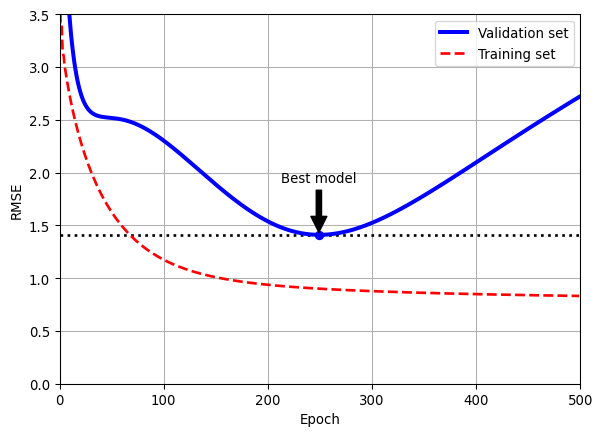

**Attribution**: Géron (2022),
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

# Prologue

## Summary

-   **Artificial Neural Networks (ANNs):**
    -   Inspired by biological neural networks.
    -   Consist of interconnected neurons arranged in layers.
    -   Applicable to supervised, unsupervised, and reinforcement
        learning.
-   **Feedforward Neural Networks (FNNs):**
    -   Information flows unidirectionally from input to output.
    -   Comprised of input, hidden, and output layers.
    -   Can vary in the number of layers and nodes per layer.
-   **Activation Functions:**
    -   Introduce non-linearity to enable learning complex patterns.
    -   Common functions: Sigmoid, Tanh, ReLU, Leaky ReLU.
    -   Choice of activation function affects gradient flow and network
        performance.
-   **Universal Approximation Theorem:**
    -   A neural network with a single hidden layer can approximate any
        continuous function.
-   **Backpropagation Algorithm:**
    -   Training involves forward pass, loss computation, backward pass,
        and weight updates.
    -   Utilizes gradient descent to minimize the loss function.
    -   Enables training of multi-layer perceptrons by adjusting
        internal weights.
-   **Vanishing Gradient Problem:**
    -   Gradients become too small during backpropagation, hindering
        training.
    -   Mitigation strategies include using ReLU activation functions
        and proper weight initialization (Glorot or He initialization).
-   **Weight Initialization:**
    -   Random initialization breaks symmetry and allows effective
        learning.
    -   Glorot initialization suits sigmoid and tanh activations.
    -   He initialization is optimal for ReLU and its variants.
-   **Loss Functions:**
    -   **Regression Tasks:** Mean Squared Error (MSE).
    -   **Classification Tasks:** Cross-Entropy Loss with Softmax
        activation for multi-class outputs.
-   **Regularization Techniques:**
    -   **L1 and L2 Regularization:** Add penalty terms to the loss to
        discourage large weights.
    -   **Dropout:** Randomly deactivate neurons during training to
        prevent overfitting.
    -   **Early Stopping:** Halt training when validation performance
        deteriorates.
-   **Key Concepts:**
    -   Learning rate determines the step size during optimization.
    -   Gradient descent is used to update weights in the direction of
        minimizing loss.
    -   Proper selection of activation functions and initialization
        methods is crucial for effective training.

## 3Blue1Brown

A series of videos, with animations, providing the **intuition** behind
the **backpropagation algorithm**.

-   [Neural
    networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
    (playlist)

    -   [What is backpropagation really
        doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3&t=212s)
        (12m 47s)
    -   [Backpropagation
        calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
        (10m 18s)

Prerequisite: [Gradient descent, how neural networks
learn?](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2)
(20m 33s)

## StatQuest

-   [Neural Networks Pt. 2: Backpropagation Main
    Ideas](https://youtu.be/IN2XmBhILt4) (17m 34s)
-   [Backpropagation Details Pt. 1: Optimizing 3 parameters
    simultaneously](https://youtu.be/iyn2zdALii8) (18m 32s)
-   [Backpropagation Details Pt. 2: Going bonkers with The Chain
    Rule](https://youtu.be/GKZoOHXGcLo) (13m 9s)

Prerequisites: [The Chain Rule](https://youtu.be/wl1myxrtQHQ) (18m 24s)
& [Gradient Descent, Step-by-Step](https://youtu.be/sDv4f4s2SB8)
(23m 54s)

## Herman Kamper

One of the most thorough series of **videos** on the **backpropagation
algorithm**.

-   [Introduction to neural
    networks](https://www.youtube.com/playlist?list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn)
    (playlist)

    -   [Backpropagation (without
        forks)](https://www.youtube.com/watch?v=6SW1oUztmzg&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=7&t=680s)
        (31m 1s)
    -   [Backprop for a multilayer feedforward neural
        network](https://www.youtube.com/watch?v=dTupaVdrz1k&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=8)
        (4m 2s)
    -   [Computational graphs and automatic differentiation for neural
        networks](https://www.youtube.com/watch?v=fBSm5ElvJEg&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=9)
        (6m 56s)
    -   [Common derivatives for neural
        networks](https://www.youtube.com/watch?v=aqnjXWxiT0o&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=10)
        (7m 18s)
    -   [A general notation for derivatives (in neural
        networks)](https://www.youtube.com/watch?v=Sa5_Gl_sYoI&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=11)
        (7m 56s)
    -   [Forks in neural
        networks](https://www.youtube.com/watch?v=6mmEw738MQo&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=12)
        (13m 46s)
    -   [Backpropagation in general (now with
        forks)](https://www.youtube.com/watch?v=aRkhgm2i4p0&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=13)
        (3m 42s)

## Summary

## Next lecture

-   We will introduce various architectures of artificial neural
    networks.

## References

Angermueller, Christof, Tanel Pärnamaa, Leopold Parts, and Oliver
Stegle. 2016. “Deep Learning for Computational Biology.” *Mol Syst Biol*
12 (7): 878. <https://doi.org/10.15252/msb.20156651>.

Cybenko, George V. 1989. “Approximation by Superpositions of a Sigmoidal
Function.” *Mathematics of Control, Signals and Systems* 2: 303–14.
<https://api.semanticscholar.org/CorpusID:3958369>.

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Glorot, Xavier, and Yoshua Bengio. 2010. “Understanding the Difficulty
of Training Deep Feedforward Neural Networks.” In *Proceedings of the
Thirteenth International Conference on Artificial Intelligence and
Statistics*, edited by Yee Whye Teh and Mike Titterington, 9:249–56.
Proceedings of Machine Learning Research. Chia Laguna Resort, Sardinia,
Italy: PMLR. <https://proceedings.mlr.press/v9/glorot10a.html>.

He, Kaiming, Xiangyu Zhang, Shaoqing Ren, and Jian Sun. 2016. “Deep
Residual Learning for Image Recognition.” In *2016 IEEE Conference on
Computer Vision and Pattern Recognition (CVPR)*, 770–78.
<https://doi.org/10.1109/CVPR.2016.90>.

Hinton, Geoffrey E., Nitish Srivastava, Alex Krizhevsky, Ilya Sutskever,
and Ruslan Salakhutdinov. 2012. “Improving Neural Networks by Preventing
Co-Adaptation of Feature Detectors.” *CoRR* abs/1207.0580.
<http://arxiv.org/abs/1207.0580>.

Hornik, Kurt, Maxwell Stinchcombe, and Halbert White. 1989. “Multilayer
Feedforward Networks Are Universal Approximators.” *Neural Networks* 2
(5): 359–66.
https://doi.org/<https://doi.org/10.1016/0893-6080(89)90020-8>.

Rumelhart, David E., Geoffrey E. Hinton, and Ronald J. Williams. 1986.
“<span class="nocase">Learning representations by back-propagating
errors</span>.” *Nature* 323 (6088): 533–36.
<https://doi.org/10.1038/323533a0>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa